In [1]:
## credits to chibuzor Nwachukwu

___

# Linear Regression for Advertising

### Table of Contents
* <a href="#overview">Overview</a>
* <a href="#wrangling">Data Wrangling</a>
* <a href="#cleaning">Data Cleaning</a>
* <a href="#eda">Exploratory Data Analysis</a>
* <a href="#model">Model</a>
* <a href="#testing&training">Training & Testing</a>
* <a href="#evaluation">Model evaluation</a>
* <a href="#conclusion">Conclusion</a>

___
<a id='overview'></a>
### Overview
We're trying to decide whether or not companies should focus their efforts and capital more on either one of TV, radio or their newspaper ads to increase their sales. We've been hired on contract to help them figure it out! Let's get started!


#### Importing and loading dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

---
<a id="wrangling"></a>
### Data Wrangling

We'll work with *Avertising* csv file. It has Advertising data with columns such as the sales made and expenditure on various ads:

* **TV**: Expenses on TV ads
* **Radio**: Expenses on Radio ads
* **Newspaper**: Expenses on Newspaper ads
* **Sales**: Total sales made

Reading the *Advertising csv* file as a DataFrame named *df*.

In [3]:
df = pd.read_csv("advertising.csv")

*Inspecting our data*

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.shape

(200, 4)

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

---
<a id="cleaning"></a>
### Data Cleaning


*We check for **null** values*

In [9]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

*We check for **duplicate** values*

In [10]:
df.duplicated().sum()

0

---
<a id='eda'></a>
### Exploratory Data Analysis



*Setting a few style 'rules'*

In [11]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

*First, we check for outliers that can really affect our model*

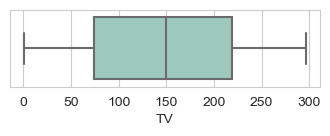

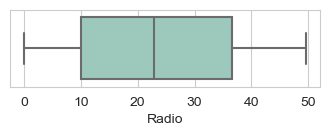

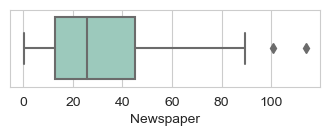

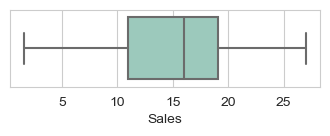

In [12]:
for i in df:
    plt.figure(figsize = (4,1))
    sns.boxplot(x = df[i])
    plt.show()

In [13]:
df.skew()

TV          -0.069853
Radio        0.094175
Newspaper    0.894720
Sales       -0.073739
dtype: float64

In [14]:
df.kurtosis()

TV          -1.226495
Radio       -1.260401
Newspaper    0.649502
Sales       -0.640075
dtype: float64

*No such outliers observed*

Next we'll create a jointplot to compare the TV and Sales columns.

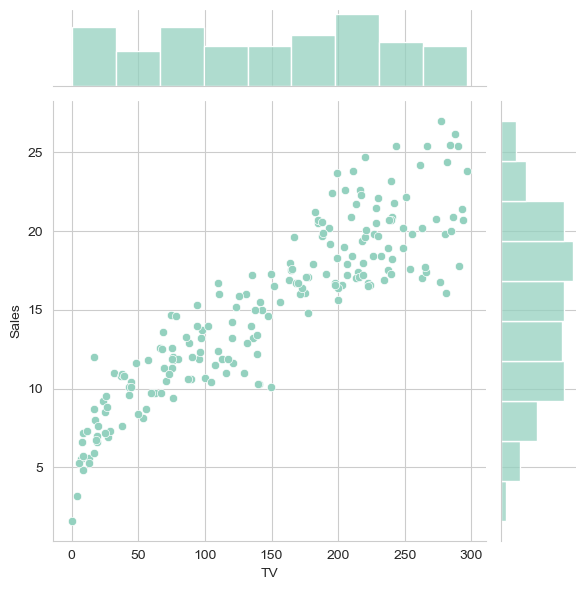

In [15]:
sns.jointplot(x='TV',y='Sales',data=df)

Doing the same, but with the Radio  & Newspaper columns respectively.

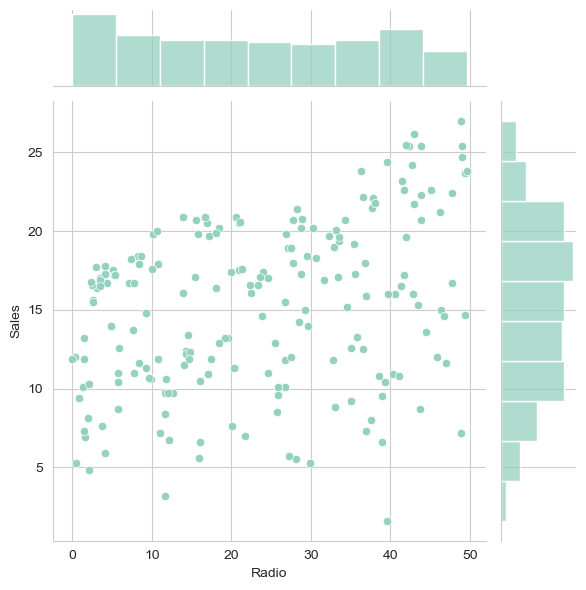

In [16]:
sns.jointplot(x='Radio',y='Sales',data=df)

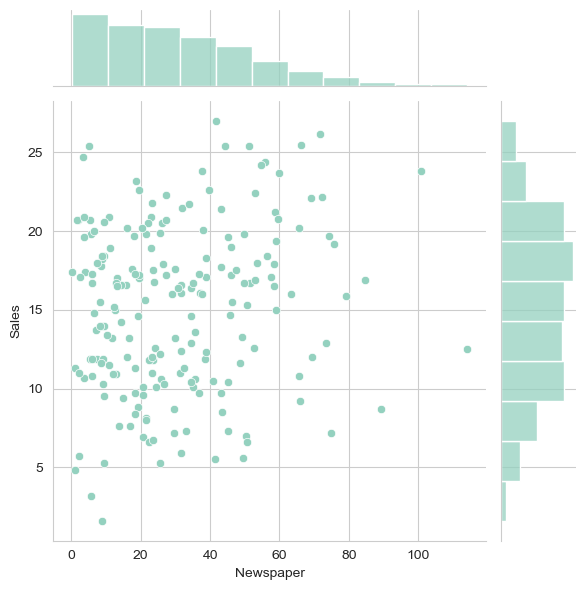

In [17]:
sns.jointplot(x='Newspaper',y='Sales',data=df)

*Now to explore these features & relationships across the entire data set. Using [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot)**

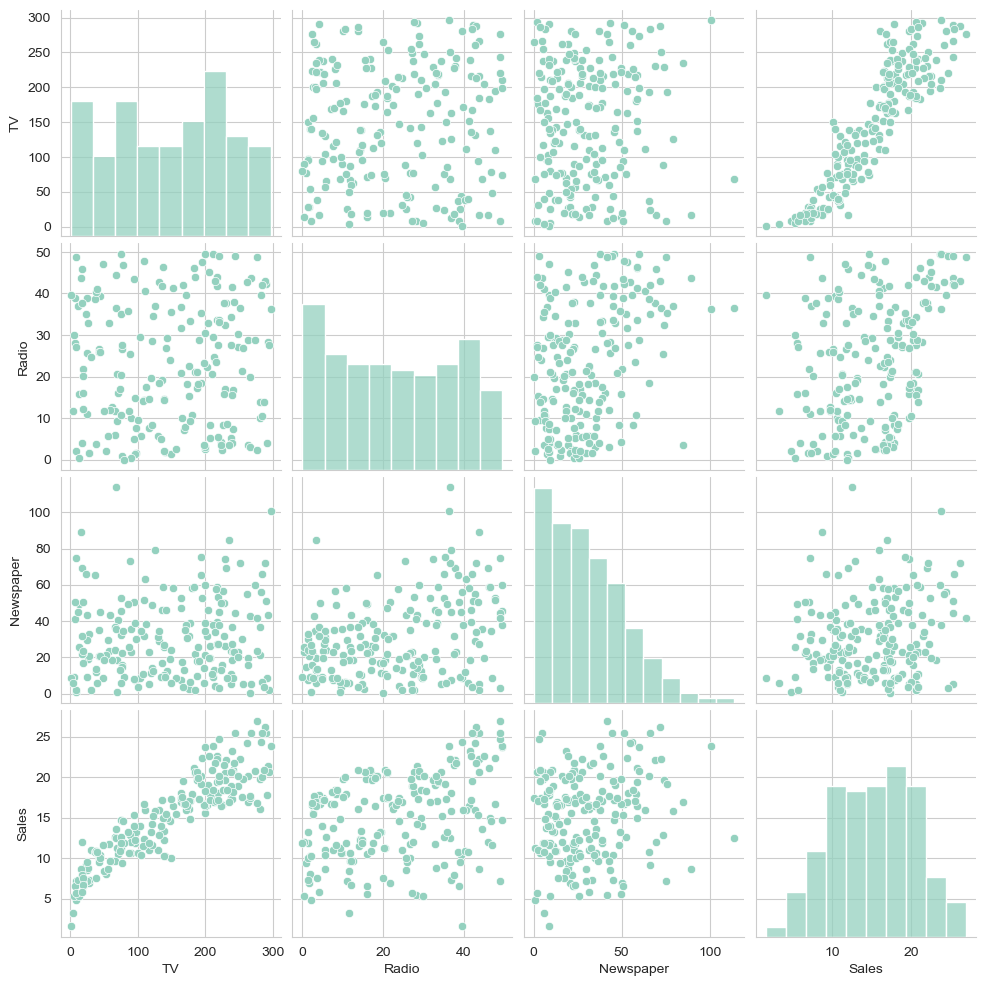

In [18]:
sns.pairplot(df)

Plotting a univariate distribution of Sales made

<AxesSubplot:xlabel='Sales', ylabel='Density'>

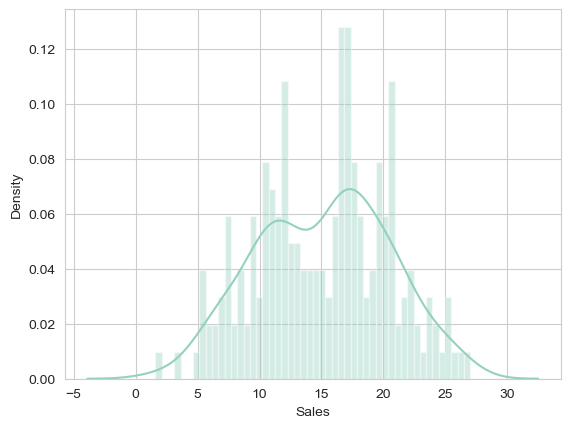

In [19]:
sns.distplot(df['Sales'], bins=50)

In [20]:
corr = df.corr()

<AxesSubplot:>

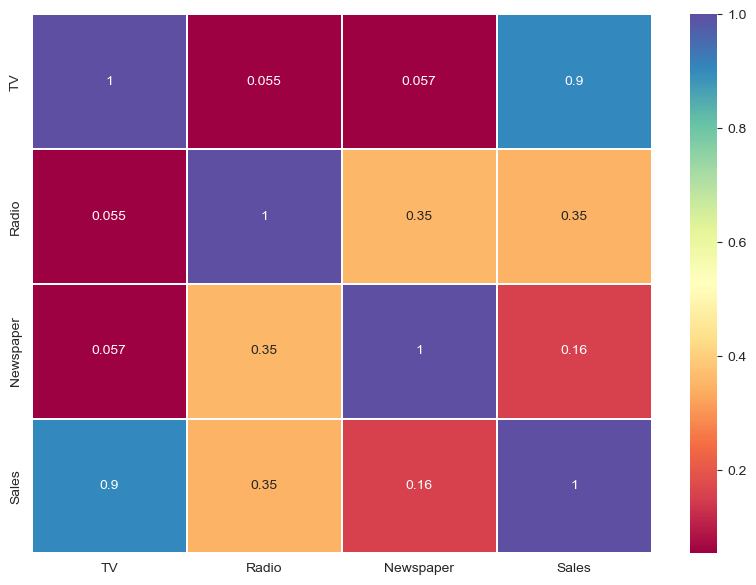

In [21]:
plt.figure(figsize=(10,7))
sns.heatmap(corr, cmap='Spectral', linewidths = .2, annot=True)

*Based off these plots what looks to be the most correlated feature with Sales?*

In [22]:
# TV is the most correlated feature with Sales

*Creating a linear model plot (using seaborn's lmplot method) of  Sale vs TV .*

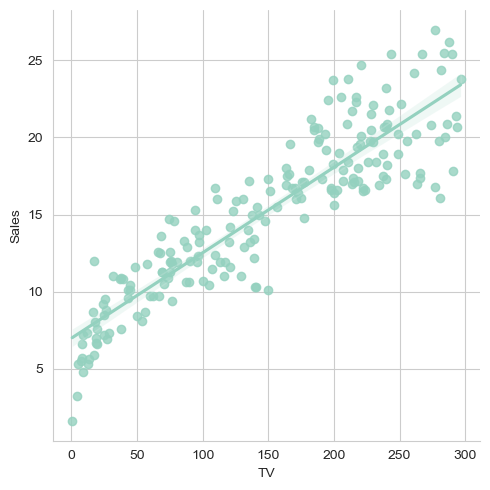

In [23]:
sns.lmplot(x='TV',y='Sales',data=df)

---
<a id='model'></a>
## Model
### Dependent and Independent variables

*Set a variable X equal to the amounts spent on different adverts (features) and a variable y equal to the "Sales" column.*

In [24]:
X = df.iloc[:,0:3]
y = df['Sales'] #target variable

*To look at the correlation between each variable*

In [25]:
X.iloc[:,0:].corr()

,TV,Radio,Newspaper
TV,1.000000,0.054809,0.056648
Radio,0.054809,1.000000,0.354104
Newspaper,0.056648,0.354104,1.000000


*As we see; no exceptionally high correlation is observed, so won't be dropping any columns*

### Viewing the OLS model

*Importing the api for statistical models*

In [26]:
import statsmodels.api as sm

In [27]:
X_sm = sm.add_constant(X)
ols_model = sm.OLS(y, X_sm).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           8.13e-99
Time:                        23:10:45   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Observations:***

*A good R<sup>2</sup> value is observed.*

*The standard error values are low which indicates absence of a multi-colinearity relationship between the values*

---
<a id="testing&training"></a>
## Training the Model

Now that we've explored the data a bit, we can go ahead and split the data into training and testing sets.

*Importing model_selection.train_test_split from sklearn to split the data into training and testing sets.*

In [28]:
from sklearn.model_selection import train_test_split

*Setting the test_size as 30%*

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

*Importing the LinearRegression from sklearn.linear_model*

In [30]:
from sklearn.linear_model import LinearRegression 

*Creating an instance of a LinearRegression() model named lm.*

In [31]:
lr = LinearRegression()

*Train/fit lr on the training data.*

In [32]:
lr.fit(X_train,y_train)

LinearRegression()

*The coefficients of the model*

In [33]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.054930
Radio,0.109558
Newspaper,-0.006194


---
## Predicting Test Data
Now that we have fit/trained our model, we can evaluate its performance by predicting off the test values.

*Use lr.predict() to predict off the X_test set of the data.*

In [34]:
predictions = lr.predict(X_test)

*Let's have some fun and try to  predict the sales of a company with their expenditure on ads*

In [35]:
lr_model = lr.fit(X, y)
# company A spends the following values on advertising on different platforms; 20,10,11
lr_model.predict([[20,10,11]])

array([6.78774421])

*Create a scatterplot of the real test values versus the predicted values.*

Text(0, 0.5, 'Predicted Sales')

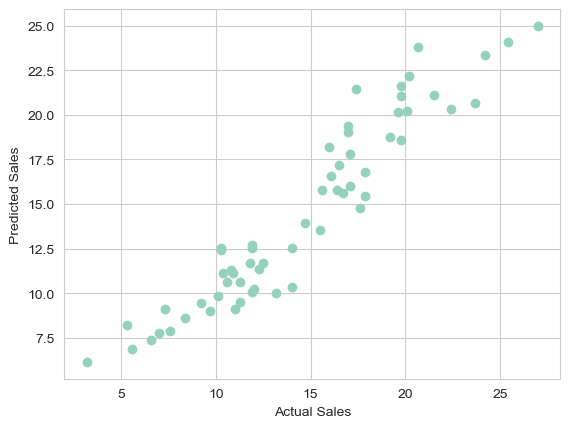

In [36]:
plt.scatter(y_test,predictions)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')

---

<a id="evaluation"></a>

## Evaluating the Model

We will now evaluate model performance by calculating the residual sum of squares and the explained variance score (R<sup>2</sup>).

In [37]:
from sklearn import metrics

print('MAE   : ', metrics.mean_absolute_error(y_test, predictions))
print('MSE   : ', metrics.mean_squared_error(y_test, predictions))
print('RMSE  : ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R^2   : ', ols_model.rsquared)

MAE   :  1.3731200698367851
MSE   :  2.868570633896497
RMSE  :  1.6936855180040058
R^2   :  0.9025912899684558


## Residuals

Now we'll explore the residuals to make sure everything was okay with our data. 

*Plot a histogram of the residuals, if it looks normally distributed, we're on the right track!*

In [38]:
residuals = y_test-predictions

<AxesSubplot:xlabel='Sales', ylabel='Density'>

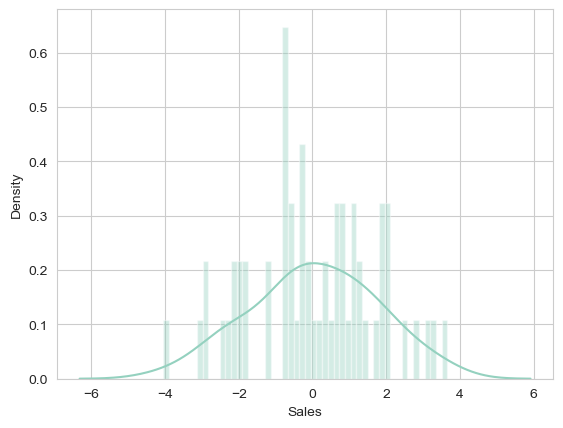

In [39]:
sns.distplot(residuals,bins=50)

---
<a id='conclusion'></a>
## Conclusion
We still want to figure out the answer to the original question, do they focus on TV, radio or newspaper ads. We interpret the coefficients to get an idea.

In [40]:
coeff_df

,Coefficient
TV,0.054930
Radio,0.109558
Newspaper,-0.006194


**How can we interpret these coefficients?**

Interpreting the coefficients, holding all other features fixed;

- a 1 unit increase in **TV ads** is associated with an **0.054930 increase in sales**.
- a 1 unit increase in **Radio ads** is associated with a **0.109558 increase in sales**.
- a 1 unit increase in **Newspaper** is associated with an **0.006194 decrease in sales**.

*Should companies focus more on TV, radio, or newspaper ads?*

**The companies should focus a bit more on promoting radio ads to see a largaer increase in sales.**

## Nice Job :-) 

We're done! The companies loved our insights! Let's move on*!!*